# Preparazione del dataset

Come presentato, i dati che utilizziamo provengono da una playlist di spotify.
Di seguito alcuni link per avere maggiori informazioni.

Dataset: https://www.kaggle.com/datasets/geomack/spotifyclassification/data

Spotify API: https://developer.spotify.com/documentation/web-api/reference/get-audio-features (per scaricare eventualmente i dati delle proprie playlist e capire il significato di ogni feature)

Per ora, non modificare la parte seguente del codice. Assicurati di aver **creato una scorciatoia** ai dati condvisi sul tuo drive.

Esegui i seguenti sei blocchi dando il consenso a Google. Quando esegui il quarto blocco assicurati di trovare nelle tue cartelle la cartella **Modulo_IA**.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [2]:
sns.set_style("darkgrid")
# sns.set_context("paper", font_scale=1.2)

In [3]:
url = "https://raw.githubusercontent.com/ggaregnani/data_spotify/refs/heads/main/data.csv"
df = pd.read_csv(url, encoding='utf-8', sep=',', index_col=0)

df.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


Il docente commenta la tabella, facendo individuare agli studenti la matrice X e il vettore y.

# PARTE 1

## Come è fatto il nostro dataset?

Scopriamo le feature (colonne) della nostra matrice.

1.   `df.info()` ci permette di ottenere informazioni su ogni colonna del dataset.o le ccordinate di un punto nel piano cartesiano.
2.   `df["target"].value_counts()` conta i valori 1 e 0 della nostra colonna target (cioè la label).


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2010 entries, 0 to 2009
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acousticness      2010 non-null   float64
 1   danceability      2010 non-null   float64
 2   duration_ms       2010 non-null   int64  
 3   energy            2010 non-null   float64
 4   instrumentalness  2010 non-null   float64
 5   key               2010 non-null   int64  
 6   liveness          2010 non-null   float64
 7   loudness          2010 non-null   float64
 8   mode              2010 non-null   int64  
 9   speechiness       2010 non-null   float64
 10  tempo             2010 non-null   float64
 11  time_signature    2010 non-null   float64
 12  valence           2010 non-null   float64
 13  target            2010 non-null   int64  
 14  song_title        2010 non-null   object 
 15  artist            2010 non-null   object 
dtypes: float64(10), int64(4), object(2)
memory usag

Che tipi di variabili sono? Quali colonne possiamo considerare? (Ricorda che le nostre feature rappresentano le coordinate di un punto nel piano cartesiano)

> [Le ultime due sono testuali object, non possiamo applicarle su un piano]

In [5]:
df["target"].value_counts()

,count
target,
1,1020
0,990


Com'è la distribuzione dei valori target?
[Buona, abbiamo una suddivisione molto vicina al 50%, il nostro modello si allenerà su dei dati equilibrati]

> [Buona, abbiamo una suddivisione molto vicina al 50%, il nostro modello si allenerà su dei dati equilibrati]



## Selezione delle feature (coordinate del punto)

Tra le colonne numeriche del dataset iniziale seleziona le feature che secondo te possono aiutarci a predirre se una nuova canzone piace o non piace all'utente.

Di seguito il codice per visualizzare il dataframe solo con le colonne numeriche.

```
numeric_cols = df.select_dtypes(include="number").columns
print(len(numeric_cols))
df[numeric_cols].head()
```


In [6]:
#Qua semplicemente togliamo le ultime due colonne, come anticipato, inutilizzabili
numeric_cols = df.select_dtypes(include="number").columns

df[numeric_cols].head()

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1
1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1
2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1
3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1
4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1


Per scegliere le due feature più significative puoi aiutarti rappresentando i punti nel piano cartesiano usando il seguente codice.


```
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes = axes.flatten()
sns.scatterplot(
    data=df,
    x="energy",
    y="loudness",
    ax=axes[0],
    hue="target")
  sns.scatterplot(
    data=df,
    x="danceability",
    y="valence",
    ax=axes[1],
    hue="target",
)
fig.suptitle("Piano cartesiano")
```

Ponendo x e y uguale al nome della colonna desiderata utilizzi quella feature come coordinata.



Text(0.5, 0.98, 'Piano cartesiano')

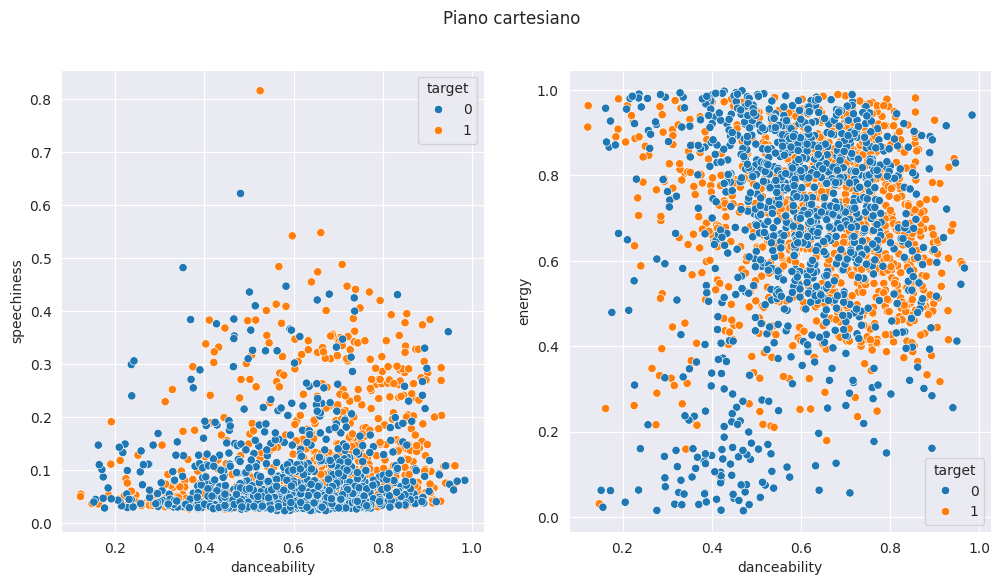

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes = axes.flatten()
sns.scatterplot(
    data=df,
    x="danceability",
    y="speechiness",
    ax=axes[0],
    hue="target")
sns.scatterplot(
    data=df,
    x="danceability",
    y="energy",
    ax=axes[1],
    hue="target",
)
fig.suptitle("Piano cartesiano")

Riporta qui le colonne che desideri selezionare creando:

1.   una lista con il nome delle due colonne. La lista si deve chiamare `feature_columns=["feature1", "feature2"]`
2.   una lista con la colonna con le label:
`target_column = "target"`

In [8]:
feature_columns = ["danceability","speechiness"]
target_column = "target"

### Osservazioni

Come scegliere le feature da utilizzare?
> [Più i punti azzurri (non piace) e arancio (piace) creano zone separate di un colore o dell'altro, vuol dire che le caratteristiche sono significative per l'utente nel distinguere il piacere o meno di una canzone. Quindi sono stati selezionati due caratteristiche che separano meglio i cluster. Notiamo che non ci sono cluster ben distinti. Forse ragionando con tre feature (tre dimensioni) potremmo osservare dei gruppi più separati)]

## Matrice X e vettore y

La seguente parte di codice suddivide il dataset nella matrice X (a 2 feature, quelle selezionate) e nel vettore y con le label (target).

```
X = df[feature_columns]
y = df[target_column]
```



In [9]:
X = df[feature_columns]
y = df[target_column]
print(X)
print(y)

      danceability  speechiness
0            0.833       0.4310
1            0.743       0.0794
2            0.838       0.2890
3            0.494       0.0261
4            0.678       0.0694
...            ...          ...
2005         0.526       0.0875
2006         0.501       0.0651
2007         0.639       0.0730
2008         0.646       0.0378
2009         0.595       0.0696

[2010 rows x 2 columns]
0       1
1       1
2       1
3       1
4       1
       ..
2005    0
2006    0
2007    0
2008    0
2009    0
Name: target, Length: 2010, dtype: int64


## Divisione del dataset in train e test
Non utilizzerai tutto il dataset per allenare il modello, ma dovrai dividerlo in due parti:

1.   Train
2.   Test

Di seguito il codice che crea la martice X e il vettore y sia per il test (20% dei dati) che per il training (80% dei dati).

La suddivisione viene fatta in maniera casuale, ma tramite la variabile *seed*, inserendo un numero, il risultato sarà sempre quello (per avere gli stessi risultato tra compagni di gruppo).

In [10]:
numero_elenco = 27

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=numero_elenco
)

`train_test_split` è il nome della funzione
test_size=0.2 (il 20% del test)

Controlla poi il numero di righe nelle diverse matrici e nei vettori ottenuti con l'attributo shape (X_train.shape).

Cosa osservi?

In [11]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1608, 2)
(1608,)
(402, 2)
(402,)


## Creazione modello

Costruiamo un modello basato sull'algoritmo k-NN .
```
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)


In [12]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)



**Fase di training**:
alleniamo il modello con la nostra matrice di training  e vettore di training.

```
model.fit(X_train, y_train)
```


In [13]:
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

**Fase di test**: Creato il modello, andiamo a prevedere se le canzoni della *matrice di test* piacciono o meno:
```
y_pred = model.predict(X_test)
```
Possiamo quindi vedere il vettore di test con i valori predetti.

In [14]:
y_pred = model.predict(X_test)

print(y_pred)


[0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 0 0 1 1 1 0 0 1 1 1 1 0 0 1 0 0 1 0 1 1 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0
 1 0 1 1 0 0 1 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 1 1
 1 0 0 1 1 0 0 1 1 1 0 1 0 0 1 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 1 1 0 1 0 0 0 1 1 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1 0
 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0 1 0 1 0 0 0 0 1 1 1 1 1 0 1 0 1 0 0 1 0 0 0
 1 0 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0 1 1 1 1 1 0 0 1 1 1 0
 1 1 1 0 0 0 1 0 0 0 0 1 1 0 1 1 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 0 1 0 0 1 0 1 1 0 1 1 0 0 1 1 0 0 0 1 0 1 0 1 1 0 1 1 0 1 1 1 0 1
 1 1 0 1 1 0 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 0
 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 0 1 1 1]


In [15]:
print(y_test)

444     1
564     1
40      1
1742    0
36      1
       ..
64      1
1811    0
948     1
1206    0
1916    0
Name: target, Length: 402, dtype: int64


# PARTE 2

Si procede quindi con la validazione del modello. Per valutare la sua performance andiamo a paragonare i risultati previsti con quelli misurati.

Costruiamo quindi una matrice di confusione nel seguente modo:

```
from sklearn.metrics import confusion_matrix

fig, ax = plt.subplots()

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(data=cm, cmap="Blues", annot=True, fmt="d", ax=ax)
ax.set_title("Confusion matrix")
ax.set_xlabel("Predicted")
ax.set_ylabel("Observed")
```

Text(50.722222222222214, 0.5, 'Observed')

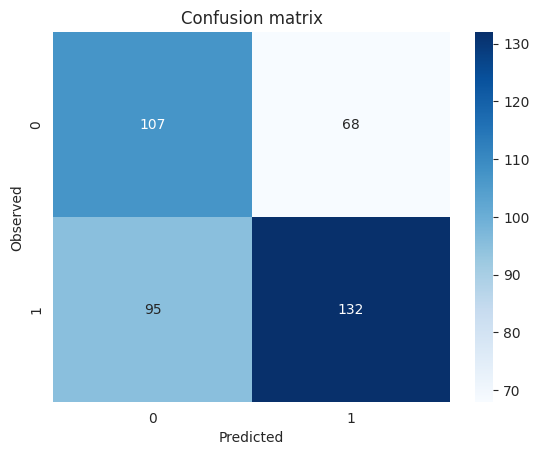

In [16]:
from sklearn.metrics import confusion_matrix

fig, ax = plt.subplots()

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(data=cm, cmap="Blues", annot=True, fmt="d", ax=ax)
ax.set_title("Confusion matrix")
ax.set_xlabel("Predicted")
ax.set_ylabel("Observed")

## Accuratezza

La variabile `cm` rappresenta la matrice di confusione. Si può accedere ai valori della matrice in maniera simile alle liste:

```
cm[0,1]
```

dove 0 è l'indice della riga della matrice e 1 l'indide della colonna.

Prova a implementare la formula per il calcolo dell'accuratezza e a confrontare il valore così ottenuto con quello calcolato dal seguente codice


```
from sklearn.metrics import accuracy_score
print("accuracy:", accuracy_score(y_test, y_pred))
```

e riporta le tue osservazioni.

In [17]:
accuratezza = (cm[0,0]+cm[1,1])/cm.sum()
print(accuratezza)

from sklearn.metrics import accuracy_score
print("accuracy:", accuracy_score(y_test, y_pred))

0.5945273631840796
accuracy: 0.5945273631840796


### Osservazioni

[lancio della monetina]

# PARTE 3

## Scelta del modello

Come abbiamo capito dall'esercitazione, cambiando l'*iperaparametro* k dell'algoritmo k-NN può cambiare il risultato.


Di seguito il codice utilizzato precedentemente per costruire il modello.

```
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=VALORE)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
```

Prova a modificare il valore di k cambiando il valore in `n_neighbors=VALORE` per ottenere un'accuratezza maggiore.

In [18]:
#Cambiare il valore in n_neighbors=XXX
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=10)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("accuracy:", accuracy_score(y_test, y_pred))

accuracy: 0.599502487562189


In [19]:
for k in range(3,100):
  model = KNeighborsClassifier(n_neighbors=k)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  print("k=", k, ":", accuracy_score(y_test, y_pred))

k= 3 : 0.5945273631840796
k= 4 : 0.5671641791044776
k= 5 : 0.5870646766169154
k= 6 : 0.5597014925373134
k= 7 : 0.599502487562189
k= 8 : 0.5895522388059702
k= 9 : 0.5970149253731343
k= 10 : 0.599502487562189
k= 11 : 0.6318407960199005
k= 12 : 0.6393034825870647
k= 13 : 0.6567164179104478
k= 14 : 0.6268656716417911
k= 15 : 0.6442786069651741
k= 16 : 0.6417910447761194
k= 17 : 0.6368159203980099
k= 18 : 0.6343283582089553
k= 19 : 0.6318407960199005
k= 20 : 0.6343283582089553
k= 21 : 0.6243781094527363
k= 22 : 0.6318407960199005
k= 23 : 0.6293532338308457
k= 24 : 0.6243781094527363
k= 25 : 0.6393034825870647
k= 26 : 0.6442786069651741
k= 27 : 0.6368159203980099
k= 28 : 0.6218905472636815
k= 29 : 0.6218905472636815
k= 30 : 0.6243781094527363
k= 31 : 0.6293532338308457
k= 32 : 0.6393034825870647
k= 33 : 0.6368159203980099
k= 34 : 0.6417910447761194
k= 35 : 0.6467661691542289
k= 36 : 0.6442786069651741
k= 37 : 0.6567164179104478
k= 38 : 0.6442786069651741
k= 39 : 0.6393034825870647
k= 40 : 0.

# PARTE 4

## Validazione finale

E ora vediamo se siamo in grado di prevedere i gusti musicali del nostro utente tramite una validazione finale.

Carichiamo dei nuovi dati e supponiamo di non conoscere la label/etichetta.

```
url = "https://raw.githubusercontent.com/ggaregnani/data_spotify/refs/heads/main/validation.csv"
df_validation = pd.read_csv(url, index_col=0)

X_validation = df_validation[feature_columns]

X_validation
```



In [24]:
url = "https://raw.githubusercontent.com/ggaregnani/data_spotify/refs/heads/main/validation.csv"
df_validation = pd.read_csv(url, index_col=0)

X_validation = df_validation[feature_columns]

X_validation

,danceability,speechiness
2010,0.624,0.0643
2011,0.528,0.1200
2012,0.584,0.3330
2013,0.894,0.1310
2014,0.637,0.1070
2015,0.557,0.1330
2016,0.446,0.1410


In [25]:

y_vpred = model.predict(X_validation)

print(y_vpred)

[0 0 1 1 0 0 0]


Confrontiamo ora la nostra previsione con i valori reali `y_reale = df_validation[target_column]`

In [26]:
y_reale = df_validation[target_column]

print(y_reale)

2010    0
2011    0
2012    0
2013    0
2014    0
2015    0
2016    0
Name: target, dtype: int64


Verificare se l'accuratezza è simile/maggiore a quella sul dataset di test. Se peggiora di molto vuol dire che abbiamo un modello troppo concentrato sui dati del dataset iniziale e avrebbe bisogno di una rivalutazione.

# PARTE 5

Abbiamo applicato uno tra i modelli più semplici di machine learning con un numero di caratteristiche limitato, 2. Immaginiamo però di poter fare questi calcoli con più di 2 dimensioni, 3, 4, 5 o anche di più. Per fare ciò si inizia ad avere bisogno di una potenza computazionale maggiore.

Nonostante ciò il k-NN ha calcoli semplici ma immaginate di applicare algoritmi molto più complessi che devono valutare migliaia o milioni di dati, sfruttando decine di caratteristiche..

Per ora ci limitiamo a provare il nostro algoritmo sulle caratteristiche che la classe ha trovato più importanti nella valutazione del target, ricostruendo il programma con più di 2 caratteristiche e vediamo se la capacità di previsione aumenta.

In [27]:
feature_columns = ["danceability","speechiness","energy","instrumentalness","valence"]
target_column = "target"  #previsione
X = df[feature_columns]
y = df[target_column]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=9
)
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=15)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score
print("accuracy:", accuracy_score(y_test, y_pred))

accuracy: 0.6666666666666666
